In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [5]:
trainset = pd.read_csv('/content/train.csv')
trainset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
testset = pd.read_csv('/content/test.csv')
testset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [7]:
print(trainset.describe())
print(trainset.isna().sum())
print(testset.isna().sum())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [8]:
numeric_cols = trainset.select_dtypes(include = np.number).columns
numeric_cols = numeric_cols.drop('SalePrice')

In [9]:
trainset[numeric_cols] = trainset[numeric_cols].fillna(trainset[numeric_cols].mean())
testset[numeric_cols] = testset[numeric_cols].fillna(testset[numeric_cols].mean())
print(trainset.isna().sum())
trainset

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [10]:
categorical_cols = trainset.select_dtypes(include = 'object').columns
trainset[categorical_cols] = trainset[categorical_cols].fillna(trainset[categorical_cols].mode().iloc[0])
testset[categorical_cols] = testset[categorical_cols].fillna(testset[categorical_cols].mode().iloc[0])
print(trainset.isna().sum().sum())

0


In [11]:
print(trainset.shape)
print(testset.shape)

(1460, 81)
(1459, 80)


In [12]:
encoder = OrdinalEncoder()
trainset[categorical_cols] = encoder.fit_transform(trainset[categorical_cols])
testset[categorical_cols] = encoder.transform(testset[categorical_cols])

In [13]:
trainset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3.0,65.0,8450,1.0,0.0,3.0,3.0,0.0,...,0,2.0,2.0,2.0,0,2,2008,8.0,4.0,208500
1,2,20,3.0,80.0,9600,1.0,0.0,3.0,3.0,0.0,...,0,2.0,2.0,2.0,0,5,2007,8.0,4.0,181500
2,3,60,3.0,68.0,11250,1.0,0.0,0.0,3.0,0.0,...,0,2.0,2.0,2.0,0,9,2008,8.0,4.0,223500
3,4,70,3.0,60.0,9550,1.0,0.0,0.0,3.0,0.0,...,0,2.0,2.0,2.0,0,2,2006,8.0,0.0,140000
4,5,60,3.0,84.0,14260,1.0,0.0,0.0,3.0,0.0,...,0,2.0,2.0,2.0,0,12,2008,8.0,4.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3.0,62.0,7917,1.0,0.0,3.0,3.0,0.0,...,0,2.0,2.0,2.0,0,8,2007,8.0,4.0,175000
1456,1457,20,3.0,85.0,13175,1.0,0.0,3.0,3.0,0.0,...,0,2.0,2.0,2.0,0,2,2010,8.0,4.0,210000
1457,1458,70,3.0,66.0,9042,1.0,0.0,3.0,3.0,0.0,...,0,2.0,0.0,2.0,2500,5,2010,8.0,4.0,266500
1458,1459,20,3.0,68.0,9717,1.0,0.0,3.0,3.0,0.0,...,0,2.0,2.0,2.0,0,4,2010,8.0,4.0,142125


In [14]:
scaler = StandardScaler()
trainset[numeric_cols] = scaler.fit_transform(trainset[numeric_cols])
testset[numeric_cols] = scaler.transform(testset[numeric_cols])

In [15]:
trainset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730865,0.073375,3.0,-0.229372,-0.207142,1.0,0.0,3.0,3.0,0.0,...,-0.068692,2.0,2.0,2.0,-0.087688,-1.599111,0.138777,8.0,4.0,208500
1,-1.728492,-0.872563,3.0,0.451936,-0.091886,1.0,0.0,3.0,3.0,0.0,...,-0.068692,2.0,2.0,2.0,-0.087688,-0.489110,-0.614439,8.0,4.0,181500
2,-1.726120,0.073375,3.0,-0.093110,0.073480,1.0,0.0,0.0,3.0,0.0,...,-0.068692,2.0,2.0,2.0,-0.087688,0.990891,0.138777,8.0,4.0,223500
3,-1.723747,0.309859,3.0,-0.456474,-0.096897,1.0,0.0,0.0,3.0,0.0,...,-0.068692,2.0,2.0,2.0,-0.087688,-1.599111,-1.367655,8.0,0.0,140000
4,-1.721374,0.073375,3.0,0.633618,0.375148,1.0,0.0,0.0,3.0,0.0,...,-0.068692,2.0,2.0,2.0,-0.087688,2.100892,0.138777,8.0,4.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,3.0,-0.365633,-0.260560,1.0,0.0,3.0,3.0,0.0,...,-0.068692,2.0,2.0,2.0,-0.087688,0.620891,-0.614439,8.0,4.0,175000
1456,1.723747,-0.872563,3.0,0.679039,0.266407,1.0,0.0,3.0,3.0,0.0,...,-0.068692,2.0,2.0,2.0,-0.087688,-1.599111,1.645210,8.0,4.0,210000
1457,1.726120,0.309859,3.0,-0.183951,-0.147810,1.0,0.0,3.0,3.0,0.0,...,-0.068692,2.0,0.0,2.0,4.953112,-0.489110,1.645210,8.0,4.0,266500
1458,1.728492,-0.872563,3.0,-0.093110,-0.080160,1.0,0.0,3.0,3.0,0.0,...,-0.068692,2.0,2.0,2.0,-0.087688,-0.859110,1.645210,8.0,4.0,142125


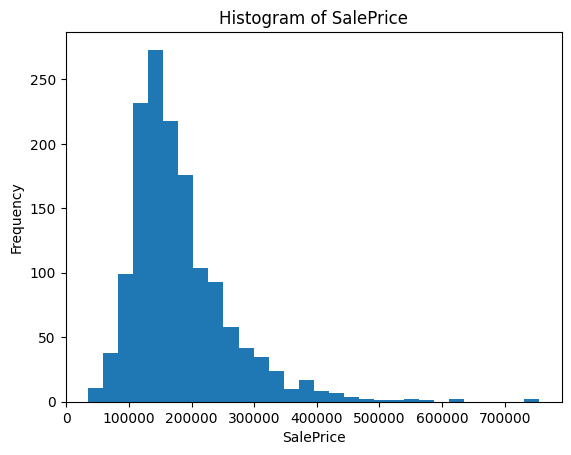

In [16]:
plt.hist(trainset['SalePrice'], bins = 30)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Histogram of SalePrice')
plt.show()

In [18]:
X_train, y_train = trainset.drop(['SalePrice'], axis = 1), trainset['SalePrice']
print(X_train.shape)
print(y_train.shape)

(1460, 80)
(1460,)


In [35]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_hat = lr_model.predict(testset)
print(y_hat.shape)
print(y_hat)
score = lr_model.score(X_train, y_train)
print(score)

(1459,)
[342741.91909443 399853.3423523  398803.10364882 ... 371993.14295032
 345489.3689682  471155.31393497]
0.8556160223719638


In [36]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_hat_dtr = dtr.predict(testset)
print(y_hat_dtr.shape)
print(y_hat_dtr)
score_dtr = dtr.score(X_train, y_train)
print(score_dtr)

(1459,)
[129000. 155000. 167000. ... 142500. 108000. 176000.]
1.0


In [37]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_hat_rfr = rfr.predict(testset)
print(y_hat_rfr.shape)
print(y_hat_rfr)
score_rfr = rfr.score(X_train, y_train)
print(score_rfr)

(1459,)
[128471.83 151563.   180793.54 ... 153374.85 111613.5  230813.28]
0.9804404422350126


In [38]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_hat_gbr = gbr.predict(testset)
print(y_hat_gbr.shape)
print(y_hat_gbr)
score_gbr = gbr.score(X_train, y_train)
print(score_gbr)

(1459,)
[120302.48749466 164332.36116321 177171.03510334 ... 158264.84229954
 118833.27142006 231010.10497591]
0.9637170187317453


In [40]:
y_hat_final = (score * y_hat + score_dtr * y_hat_dtr + score_rfr * y_hat_rfr + score_gbr * y_hat_gbr)/ (score + score_rfr + score_dtr + score_gbr)
print(y_hat_final.shape)
print(y_hat_final)

(1459,)
[174787.26372564 211615.06541619 225335.10723053 ... 200980.59119105
 165156.75941173 270556.93822737]
